In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1323 files belonging to 3 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 60 files belonging to 3 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[133.57031  143.32031  118.57031 ]
   [123.14844  133.14844  108.14844 ]
   [101.1875   111.1875    86.1875  ]
   ...
   [ 45.867188  73.86719   48.867188]
   [ 53.585938  78.64844   56.460938]
   [ 67.625     89.625     66.625   ]]

  [[181.02344  185.26562  168.47656 ]
   [160.07031  166.07031  152.07031 ]
   [114.50781  126.50781  106.50781 ]
   ...
   [ 57.8125    82.8125    60.8125  ]
   [ 56.625     84.625     61.625   ]
   [ 60.890625  84.8125    60.851562]]

  [[181.66406  184.95312  171.60156 ]
   [180.       185.       178.      ]
   [134.1875   151.0625   130.1875  ]
   ...
   [ 46.3125    74.3125    51.3125  ]
   [ 48.054688  74.05469   47.804688]
   [ 39.1875    62.1875    33.1875  ]]

  ...

  [[255.       255.       255.      ]
   [250.3125   254.80469  253.6875  ]
   [245.       255.       255.      ]
   ...
   [189.42969  195.42969  157.42969 ]
   [153.01562  161.95312  121.265625]
   [109.83594  124.96094   86.25    ]]

  [[255.       255.       255.    

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [10]:
# Example model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # Flatten the 2D output to 1D
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes
])

C:\Users\Sanzida\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 127008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,257,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,775,307 (186.06 MB)

 Trainable params: 16,258,435 (62.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,516,872 (124.04 MB)

In [12]:
training_history = model.fit(training_set,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_set,
                    validation_batch_size=16)


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.3938 - loss: 3548.5022 - val_accuracy: 0.6833 - val_loss: 51.8343
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8182 - loss: 19.5995 - val_accuracy: 0.6833 - val_loss: 32.6094
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8931 - loss: 7.8556 - val_accuracy: 0.6833 - val_loss: 25.1711
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9295 - loss: 2.8096 - val_accuracy: 0.7167 - val_loss: 20.5494
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9669 - loss: 1.2730 - val_accuracy: 0.8000 - val_loss: 18.6100


In [13]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 801ms/step - accuracy: 0.9500 - loss: 2.1311
Training accuracy: 0.9417989253997803


In [14]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 612ms/step - accuracy: 0.8354 - loss: 15.4562
Validation accuracy: 0.800000011920929


In [16]:
model.save('trained_plant_disease_model.keras')

In [17]:
training_history.history #Return Dictionary of history

{'accuracy': [0.47694632411003113,
  0.8427815437316895,
  0.9017384648323059,
  0.9319728016853333,
  0.9652305245399475],
 'loss': [1738.021728515625,
  15.394547462463379,
  6.5993828773498535,
  2.4135730266571045,
  1.2678277492523193],
 'val_accuracy': [0.6833333373069763,
  0.6833333373069763,
  0.6833333373069763,
  0.7166666388511658,
  0.800000011920929],
 'val_loss': [51.83433532714844,
  32.609352111816406,
  25.17108154296875,
  20.54937171936035,
  18.610029220581055]}

In [18]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [19]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

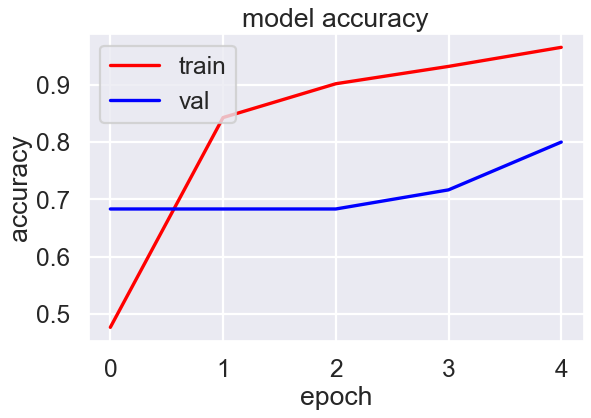

In [27]:
import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(8, 5), dpi=80)

plt.plot(training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [29]:
class_name = validation_set.class_names
class_name

['Healthy', 'Powdery', 'Rust']

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 60 files belonging to 3 classes.


In [33]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
Y_true

<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)>

In [36]:
predicted_categories

<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int64)>

In [37]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [39]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

     Healthy       0.64      0.90      0.75        20
     Powdery       0.94      0.75      0.83        20
        Rust       0.94      0.75      0.83        20

    accuracy                           0.80        60
   macro avg       0.84      0.80      0.81        60
weighted avg       0.84      0.80      0.81        60



In [40]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[18,  1,  1],
       [ 5, 15,  0],
       [ 5,  0, 15]], dtype=int64)

In [41]:
cmn = cm / cm.astype(float).sum(axis=1)

In [42]:
labels=['Healthy', 'Powdery', 'Rust']

<Axes: >

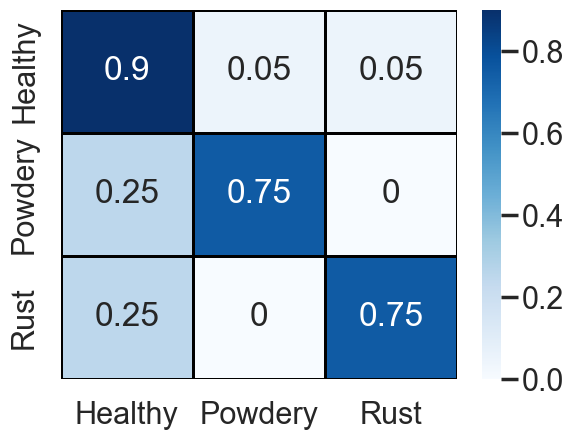

In [44]:
sns.heatmap(cmn,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels)

<Axes: >

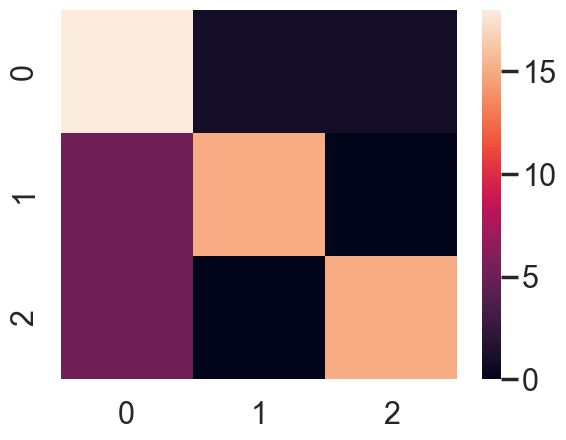

In [45]:
sns.heatmap(cm)

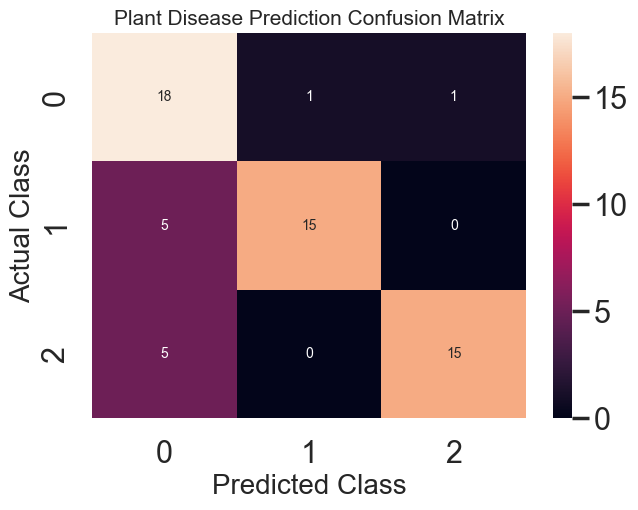

In [51]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 15)
plt.show()